In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# TensorFlow/Keras Basics Notebook
### *Build your first neural networks & CNNs*

## Importing Required Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

## Build a Simple Neural Network

In [3]:
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10,)),
    layers.Dense(1, activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

## Train Model on Random Data
(Demo purpose only)

In [4]:
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, 1000)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5087 - loss: 0.6951
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5144 - loss: 0.6947
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5208 - loss: 0.6939
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5337 - loss: 0.6932
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5293 - loss: 0.6908


## Build a Simple CNN

In [5]:
cnn = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(64,64,1)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])
cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,073 (43.25 KB)

 Trainable params: 11,073 (43.25 KB)

 Non-trainable params: 0 (0.00 B)

## Train CNN on Dummy Images

In [6]:
X = np.random.rand(200, 64, 64, 1)
y = np.random.randint(0, 2, 200)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X, y, epochs=3)

Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 291ms/step - accuracy: 0.5414 - loss: 0.6939
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5603 - loss: 0.6852 
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7153 - loss: 0.6821 


## Build a U-Net Block (Foundation for Segmentation Models)

In [7]:
def conv_block(x, filters):
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    return x

inp = layers.Input((128,128,1))
out = conv_block(inp, 16)
unet_demo = models.Model(inp, out)
unet_demo.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 16)   │         2,320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,480 (9.69 KB)

 Trainable params: 2,480 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

## **Exercises**
1. Modify the CNN to include **Dropout**.
2. Add more convolution layers to increase accuracy.
3. Build the **encoder part** of U-Net using conv_block.
4. Train CNN on a real dataset (MNIST or CIFAR10).
5. Plot training curves (loss & accuracy) using matplotlib.


## Exercise 1: Modify CNN to include Dropout

In [8]:
# Build CNN with Dropout for regularization
cnn_with_dropout = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(64,64,1)),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),  # Drop 25% of neurons
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Higher dropout for dense layer
    layers.Dense(1, activation='sigmoid')
])

cnn_with_dropout.summary()

# Train on dummy data
X = np.random.rand(200, 64, 64, 1)
y = np.random.randint(0, 2, 200)
cnn_with_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = cnn_with_dropout.fit(X, y, epochs=3, validation_split=0.2, verbose=1)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 406,337 (1.55 MB)

 Trainable params: 406,337 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 282ms/step - accuracy: 0.4513 - loss: 0.8972 - val_accuracy: 0.4750 - val_loss: 0.6948
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4900 - loss: 0.6945 - val_accuracy: 0.5250 - val_loss: 0.6901
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4194 - loss: 0.7206 - val_accuracy: 0.4250 - val_loss: 0.6931


## Exercise 2: Add more convolution layers

In [9]:
# Deeper CNN architecture
deeper_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)),
    layers.Conv2D(32, (3,3), activation='relu'),  # Additional conv layer
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Conv2D(64, (3,3), activation='relu'),  # Additional conv layer
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),  # Additional conv block
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

deeper_cnn.summary()

# Calculate total parameters
total_params = deeper_cnn.count_params()
print(f"Total parameters: {total_params:,}")

# Train on dummy data
X = np.random.rand(200, 64, 64, 1)
y = np.random.randint(0, 2, 200)
deeper_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = deeper_cnn.fit(X, y, epochs=3, validation_split=0.2, verbose=1)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 548,705 (2.09 MB)

 Trainable params: 548,705 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

Total parameters: 548,705
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 496ms/step - accuracy: 0.5430 - loss: 0.6891 - val_accuracy: 0.6250 - val_loss: 0.6920
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5310 - loss: 0.6907 - val_accuracy: 0.3750 - val_loss: 0.7424
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5530 - loss: 0.6905 - val_accuracy: 0.3750 - val_loss: 0.7239


## Exercise 3: Build encoder part of U-Net

In [10]:
def conv_block(x, filters):
    """Double convolution block"""
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    return x

def encoder_block(x, filters):
    """Encoder block: conv_block + max pooling"""
    x = conv_block(x, filters)
    p = layers.MaxPooling2D((2, 2))(x)  # Downsample
    return x, p  # Return both conv output (for skip connections) and pooled output

# Build U-Net Encoder
inputs = layers.Input((128, 128, 1))

# Encoder path (contracting path)
skip1, p1 = encoder_block(inputs, 32)    # 128x128 -> 64x64
skip2, p2 = encoder_block(p1, 64)        # 64x64 -> 32x32
skip3, p3 = encoder_block(p2, 128)       # 32x32 -> 16x16
skip4, p4 = encoder_block(p3, 256)       # 16x16 -> 8x8

# Bottleneck (deepest part)
bottleneck = conv_block(p4, 512)

# Create encoder model
encoder = models.Model(inputs=inputs, outputs=bottleneck, name='U-Net_Encoder')
encoder.summary()

# Visualize architecture
try:
    tf.keras.utils.plot_model(encoder, show_shapes=True, show_layer_names=True)
except:
    print("Install graphviz and pydot for visualization")

Model: "U-Net_Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,711,648 (17.97 MB)

 Trainable params: 4,711,648 (17.97 MB)

 Non-trainable params: 0 (0.00 B)

## Exercise 4: Train CNN on real dataset (MNIST)

In [11]:
# Load and preprocess MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape for CNN
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)  # Add channel dimension
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to binary (even/odd numbers for binary classification)
y_train_binary = (y_train % 2).astype('float32')  # 0 for even, 1 for odd
y_test_binary = (y_test % 2).astype('float32')

print(f"Training data shape: {X_train.shape}")
print(f"Training labels: {y_train_binary.shape}")
print(f"Sample distribution: {np.bincount(y_train_binary.astype(int))}")

# Build CNN for MNIST
mnist_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

mnist_cnn.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.Recall(name='recall')])

# Train model
history = mnist_cnn.fit(X_train, y_train_binary,
                        epochs=5,
                        batch_size=64,
                        validation_split=0.2,
                        verbose=1)

# Evaluate on test set
test_loss, test_acc, test_precision, test_recall = mnist_cnn.evaluate(X_test, y_test_binary, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

# Make predictions
sample_idx = 0
sample_image = X_test[sample_idx]
sample_label = y_test_binary[sample_idx]
prediction = mnist_cnn.predict(sample_image.reshape(1, 28, 28, 1))[0][0]
print(f"\nSample Prediction: {prediction:.4f} (Actual: {sample_label})")
print(f"Predicted class: {'Odd' if prediction > 0.5 else 'Even'}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (60000, 28, 28, 1)
Training labels: (60000,)
Sample distribution: [29492 30508]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9108 - loss: 0.2126 - precision: 0.9164 - recall: 0.9024 - val_accuracy: 0.9813 - val_loss: 0.0488 - val_precision: 0.9746 - val_recall: 0.9888
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9829 - loss: 0.0514 - precision: 0.9833 - recall: 0.9830 - val_accuracy: 0.9887 - val_loss: 0.0350 - val_precision: 0.9894 - val_recall: 0.9881
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9877 - loss: 0.0387 - precision: 0.9876 - recall: 0.9880 - val_accuracy: 0.9897 - val_loss: 0.0317 - val_precision: 0.9955 - val_recall: 0.9840
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9900 - loss: 0.0315 - precision: 0.9903 - recall: 0.9902 - val_accuracy: 0.9928 - val_loss: 0.0248 - val_precision: 0.9936 - val_recall: 0.9922
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9915 - loss: 0.0247 - precision: 0.9921 - recall: 0.9913 - val_accuracy: 0.9937 - val_loss: 0.0238 

## Exercise 5: Plot training curves

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


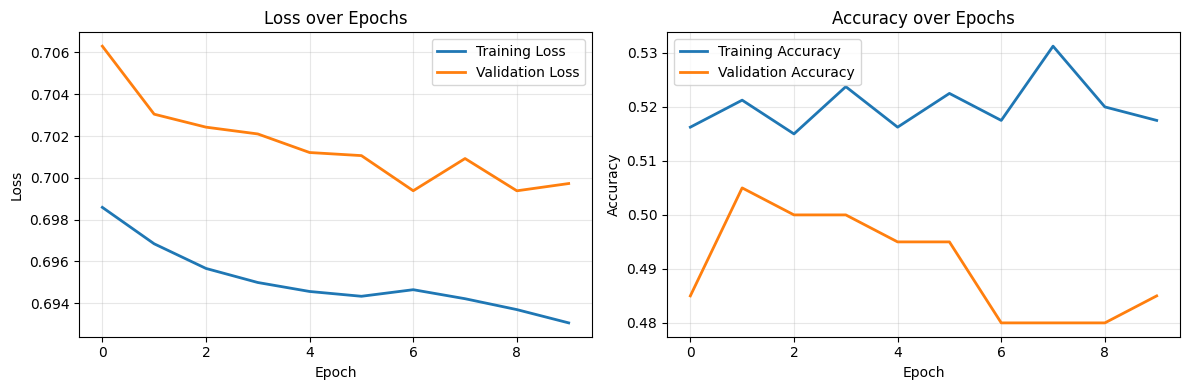

Final Training Metrics:
  - Loss: 0.6931
  - Accuracy: 0.5175

Final Validation Metrics:
  - Loss: 0.6997
  - Accuracy: 0.4850


In [12]:
def plot_training_history(history):
    """Plot loss and accuracy curves"""
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Plot loss
    axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
    axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[0].set_title('Loss over Epochs')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Plot accuracy
    axes[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    axes[1].set_title('Accuracy over Epochs')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print final metrics
    print("Final Training Metrics:")
    print(f"  - Loss: {history.history['loss'][-1]:.4f}")
    print(f"  - Accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"\nFinal Validation Metrics:")
    print(f"  - Loss: {history.history['val_loss'][-1]:.4f}")
    print(f"  - Accuracy: {history.history['val_accuracy'][-1]:.4f}")

# Example: Train a simple model and plot
simple_model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10,)),
    layers.Dense(1, activation='sigmoid')
])

simple_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Generate data
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, 1000)

# Train with validation split
history = simple_model.fit(X, y,
                          epochs=10,
                          batch_size=32,
                          validation_split=0.2,
                          verbose=0)

# Plot the training curves
plot_training_history(history)

# Additional: Plot learning curves for multiple metrics if available
if 'precision' in history.history:
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    metrics = ['loss', 'accuracy', 'precision', 'recall']

    for idx, metric in enumerate(metrics):
        ax = axes[idx//2, idx%2]
        if metric in history.history:
            ax.plot(history.history[metric], label=f'Training {metric}', linewidth=2)
            ax.plot(history.history[f'val_{metric}'], label=f'Validation {metric}', linewidth=2)
            ax.set_title(f'{metric.capitalize()} over Epochs')
            ax.set_xlabel('Epoch')
            ax.set_ylabel(metric.capitalize())
            ax.legend()
            ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()